# Analyze Sort-seq

Sort-seq library question 1: Do half sites regulate expression of promoters without a canonical site?

This module analyzes the Sort-seq data and made Figure5A in Recio et al., 

Written by PSR

In [1]:
import pandas as pd
import statistics 
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat

In [2]:
#function that outputs log2 fc in expression 
#x = wt
#y = mutant
def log2_fc(X, Y):
    z = (Y/X)
    #return z 
    return math.log(z ,2)

In [3]:
#function that takes the fc between two lists of means (mut/wt)
def fc_list(list1, list2):
    fc_list = []
    zip_object = zip(list1, list2)
    for list1_i, list2_i in zip_object:
        fc_list.append(log2_fc(list1_i,list2_i))
    return fc_list

In [4]:
#functions for anova and tukey test 
def anova_table(df, outputfile):
    model = ols('Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table.to_csv(outputfile)
def tukey_table(df, output_file):
    res = stat()
    res2 = stat()
    res3 = stat()
    res.tukey_hsd(df=df, res_var='Expression', xfac_var='Sequence_type', anova_model='Expression~C(Sequence_type)+C(Promoter)+C(Sequence_type):C(Promoter)')
    res2.tukey_hsd(df=df, res_var='Expression', xfac_var='Promoter', anova_model='Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)')
    res3.tukey_hsd(df=df, res_var='Expression', xfac_var=['Sequence_type','Promoter'], anova_model='Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)')
    res3.tukey_summary.to_csv("Tukey" + output_file)
    #return res3.tukey_summary
    


In [5]:
def make_q2_df(df, pr_name):
    "This function makes a df of sequences with mutated half sites"
    promoter_q2 = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"]== "site_mutation")]
    promoter_q2_rand_cont = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"]== "random_site_mutation")]
    promoter_q2_CG_cont = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"]== "site_mutation_CG_maintain")]

    return promoter_q2, promoter_q2_rand_cont, promoter_q2_CG_cont

def make_q1_df(df):
    wt_halfsitepr= df.loc[(df['Sequence_type']== "WT") & ~df['Promoter'].str.contains(filter_out2)]
    q1_df = df.loc[(df['Sequence_type']== "WT") & ~df['Promoter'].str.contains(filter_out2)| df['Sequence_type'].str.contains("mutCGG") & ~df['Promoter'].str.contains(filter_out2)]
    q1_df = q1_df.replace({'Sequence_type': {"mutCGG1": "mutCGG", "mutCGG2": "mutCGG"}})
    return wt_halfsitepr, q1_df
def make_q1_ran(df):
    q1_ran_df = df.loc[ df['Sequence_type'].str.contains("ranmut") & ~df['Promoter'].str.contains(filter_out2)]
    q1_ran_df = q1_ran_df.replace({'Sequence_type': {"ranmut1": "ranmut", "ranmut2": "ranmut"}})
    return q1_ran_df
def get_q1_means(pr_cgg_df):
    #wt_means = wt_halfsitepr['Expression'].tolist()
    cgg_means = pr_cgg_df['Expression'].tolist()
    #cgg2_means = pr_CGG2_q1['Expression'].tolist()
    return cgg_means

In [6]:
expression_file = "L4_gal4_anova_analysis.csv"
expression_file2 = "L4_leu3_anova.csv"
expression_file3 = "L4_tea1_anova.csv"
expression_file4 = "L4_yrm1_final.csv"

In [7]:
expression_ko_file = "L4_gal4KO_anova_analysis.csv"
expression_ko_file2 = "L4_leu3_ko.csv"
expression_ko_file3 = "L4_tea1_ko.csv"
expression_ko_file4 = "L4_yrm1_ko.csv"

In [66]:
df = pd.read_csv(expression_file, header= None)
df_ko = pd.read_csv(expression_ko_file, header= None)


df.columns = ['Sequence_type', 'Promoter', 'halfsite_num', 'Expression']
df_ko.columns = ['Sequence_type', 'Promoter', 'halfsite_num', 'Expression']

Question 1

In [67]:
df

,Sequence_type,Promoter,halfsite_num,Expression
0,WT,ADR1pr_reg1,15,8721.071522
1,WT,HAP4pr_reg1,11,7831.710691
2,WT,STP4pr_reg1,10,4239.085211
3,WT,GID8pr_reg1,9,2854.170674
4,WT,GAL1_10pr,8,16441.696230
...,...,...,...,...
1705,space_mutation,ADR1pr_reg1,9,4095.898372
1706,space_mutation,HAP4pr_reg1,6,4577.902737
1707,space_mutation,STP4pr_reg1,7,4582.221596
1708,space_mutation,GID8pr_reg1,6,2325.951183


In [81]:
filter_out = "GID8"
filter_out2 = "GAL1"
df = df.loc[~df['Promoter'].str.contains(filter_out)& ~df['Promoter'].str.contains(filter_out2)]


In [82]:
df_ko = df_ko.loc[~df_ko['Promoter'].str.contains(filter_out)& ~df_ko['Promoter'].str.contains(filter_out2)]
df

,Sequence_type,Promoter,halfsite_num,Expression
0,WT,ADR1pr_reg1,15,8721.071522
1,WT,HAP4pr_reg1,11,7831.710691
2,WT,STP4pr_reg1,10,4239.085211
6,mutCGG1,ADR1pr_reg1,0,675.510536
7,mutCGG2,ADR1pr_reg1,0,4783.209415
...,...,...,...,...
1701,space_mutation,HAP4pr_reg1,7,1251.999401
1702,space_mutation,STP4pr_reg1,7,2931.382329
1705,space_mutation,ADR1pr_reg1,9,4095.898372
1706,space_mutation,HAP4pr_reg1,6,4577.902737


In [83]:
df_wt, df_mut_halfsite = make_q1_df(df)
df_wt_ko, df_mut_halfsite_ko = make_q1_df(df_ko)

In [84]:
df_ran = make_q1_ran(df)

In [85]:
df_wt

,Sequence_type,Promoter,halfsite_num,Expression
0,WT,ADR1pr_reg1,15,8721.071522
1,WT,HAP4pr_reg1,11,7831.710691
2,WT,STP4pr_reg1,10,4239.085211
570,WT,ADR1pr_reg1,15,7614.706826
571,WT,HAP4pr_reg1,11,4952.743084
572,WT,STP4pr_reg1,10,5255.418562
1140,WT,ADR1pr_reg1,15,7979.507880
1141,WT,HAP4pr_reg1,11,5127.792100
1142,WT,STP4pr_reg1,10,4885.289923


In [86]:
means_wt  = get_q1_means(df_mut_halfsite)
means_ko = get_q1_means(df_mut_halfsite_ko)
means_ran = get_q1_means(df_ran)

In [87]:
df_mut = df_mut_halfsite[~df_mut_halfsite["Sequence_type"].str.contains("WT")]

In [88]:
df_mut

,Sequence_type,Promoter,halfsite_num,Expression
6,mutCGG,ADR1pr_reg1,0,675.510536
7,mutCGG,ADR1pr_reg1,0,4783.209415
10,mutCGG,HAP4pr_reg1,0,725.058944
11,mutCGG,HAP4pr_reg1,0,1039.421118
14,mutCGG,STP4pr_reg1,0,668.729163
15,mutCGG,STP4pr_reg1,0,2309.836636
576,mutCGG,ADR1pr_reg1,0,1538.018693
577,mutCGG,ADR1pr_reg1,0,3554.689723
580,mutCGG,HAP4pr_reg1,0,2094.763930
581,mutCGG,HAP4pr_reg1,0,927.807006


In [89]:
df_mut_mean = df_mut.groupby(["Promoter"]).mean()
df_wt_mean = df_wt.groupby(["Promoter"]).mean()
df_ran_mean = df_ran.groupby(["Promoter"]).mean()

In [90]:
wt_means = df_wt_mean["Expression"].to_list()
mut_means = df_mut_mean["Expression"].to_list()
ran_means = df_ran_mean["Expression"].to_list()

In [91]:
mut_means

[2324.81932225, 1586.7045360833336, 1852.3923998999999]

In [92]:
data1 = fc_list(wt_means, ran_means)
statistics.mean(data1)

-0.7454991951215141

gal4 = -0.75
leu3 = -0.47
tea1 = 0.13 
yrm1 = -0.43

In [135]:
# df_wt_ko = df_wt_ko.replace({'Sequence_type': {"WT": "WT_KO"}})

In [136]:
# [df_wt, df_wt_ko]

In [137]:
#df_mut_halfsite["difference_expression"] = df_mut_halfsite["Expression"] - df_mut_halfsite_ko["Expression"]

# ran_df = make_q1_ran(df)
# names = ran_df["Promoter"].tolist()
# names = list(set(names))

In [138]:
#df_mut_halfsite["log2fc"]= fc_list(means_wt, means_ko)


In [139]:
df_mut_halfsite_ko_copy= df_mut_halfsite_ko.replace({'Sequence_type': {"WT": "WT_KO", "mutCGG": "mutCGG_KO"}})

In [140]:
wt_combined = pd.concat([wt_filter, wt_filter_ko])
names = wt_combined["Promoter"].tolist()
names = list(set(names))

In [141]:
combined = pd.concat([df_mut_halfsite, df_mut_halfsite_ko_copy])

In [142]:
wt_filter_ko = df_mut_halfsite_ko_copy[df_mut_halfsite_ko_copy["Sequence_type"].str.contains("WT")]
wt_filter = df_mut_halfsite[df_mut_halfsite["Sequence_type"].str.contains("WT")]
wt_combined = pd.concat([wt_filter, wt_filter_ko])

In [143]:
wt_combined

,Sequence_type,Promoter,halfsite_num,Expression
0,WT,ADR1pr_reg1,15,8721.071522
1,WT,HAP4pr_reg1,11,7831.710691
2,WT,STP4pr_reg1,10,4239.085211
570,WT,ADR1pr_reg1,15,7614.706826
571,WT,HAP4pr_reg1,11,4952.743084
572,WT,STP4pr_reg1,10,5255.418562
1140,WT,ADR1pr_reg1,15,7979.507880
1141,WT,HAP4pr_reg1,11,5127.792100
1142,WT,STP4pr_reg1,10,4885.289923
0,WT_KO,ADR1pr_reg1,15,3902.929003


In [144]:
#float(wt_combined["Expression"])
wt_combined["Expression"] = pd.to_numeric(wt_combined["Expression"])

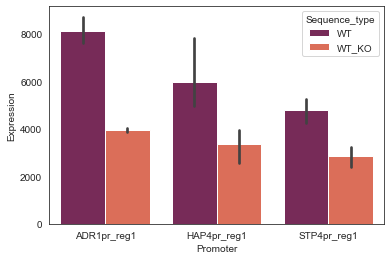

In [145]:
ax = sns.barplot(x="Promoter", y="Expression", hue="Sequence_type", data=wt_combined, palette="rocket")

    

In [106]:


pairs = [[(names[0], 'WT'), (names[0], 'WT_KO')], [(names[1], 'WT'), (names[1],'WT_KO')],[(names[2], 'WT'), (names[2], 'WT_KO')],]
#     [('WT', 'ADR1pr_reg1'), ('mutCGG2', 'ADR1pr_reg1')],
#     [('WT', 'HAP4pr_reg1'), ('mutCGG2', 'HAP4pr_reg1')],
#     [('WT', 'STP4pr_reg1'), ('mutCGG2', 'STP4pr_reg1')],
# ]

hue_plot_params = {
    'data': wt_combined,
    'x': 'Promoter',
    'y': 'Expression',
    #'order': subcat_order,
    "hue": "Sequence_type",
    #"hue_order": states_order,
    "palette": "rocket_r",}



In [146]:
names

['STP4pr_reg1', 'GID8pr_reg1', 'ADR1pr_reg1', 'HAP4pr_reg1']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LEU3_Mdh2pr_WT vs. LEU3_Mdh2pr_WT_KO: Custom statistical test, P_val:1.000e-03
LEU3_Ipt1/Snf11pr_WT vs. LEU3_Ipt1/Snf11pr_WT_KO: Custom statistical test, P_val:2.000e-02
LEU3_Sod1/Ado1pr_WT vs. LEU3_Sod1/Ado1pr_WT_KO: Custom statistical test, P_val:1.100e-01


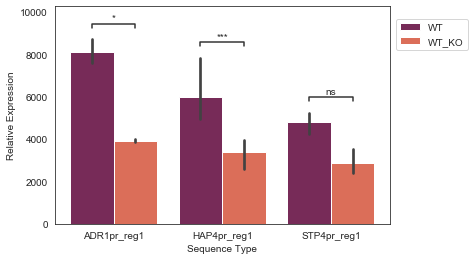

In [148]:
sns.set_style("white")
subcat_order = names
states_order = ["WT", "WT_KO"]
#formatted_pvalues = ['p=1.35e-04', 'p=2.56e-01', 'p=2.30e-04', 'p=2.00e-01', 'p=2.00e-01', 'p=2.00e-01']
pvalues = [0.001, 0.02, 0.11]
ax = sns.barplot(x="Promoter", y="Expression", hue="Sequence_type", data=wt_combined, palette="rocket")
ax.set_xlabel('Sequence Type')
ax.set_ylabel('Relative Expression')
plt.legend(frameon=True, loc=(1.02, 0.8), borderaxespad=0)
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
plt.savefig("gal4_q1_ko_supp.pdf", bbox_inches='tight')

In [147]:
tukey = tukey_table(wt_combined, "_ko_gal4.csv")
#tukey_filtered = tukey.loc[(tukey["group1"].str.contains("WT")) & (tukey["group2"].str.contains("WT_KO")] #|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton")| (tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_mutcan")|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_CG_control")|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_CG_control_mutcan") |(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_CG_control")|(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_mutcan")|(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_CG_control_mutcan")]



In [ ]:
anova_table(ran_df, "q1_anova_ranmut_gal4.csv")